In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataf = pd.read_csv("/content/train.csv")

In [3]:
dataf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dataf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dataf.shape

(891, 12)

In [9]:
dataf.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
dataf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
dataf = dataf.drop('Cabin',axis=1)

In [12]:
dataf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data  = dataf.dropna(subset=['Age','Embarked'])

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

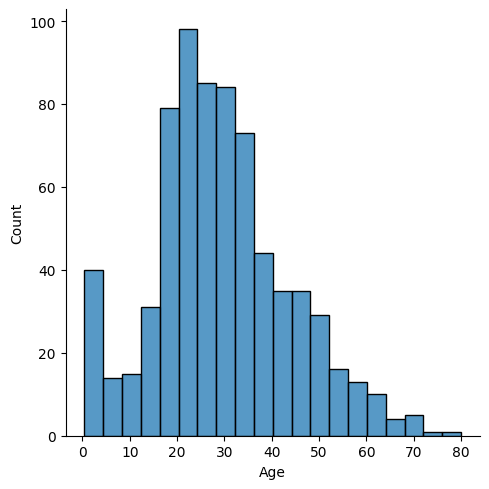

In [15]:
sns.displot(data['Age'])

<Axes: ylabel='Age'>

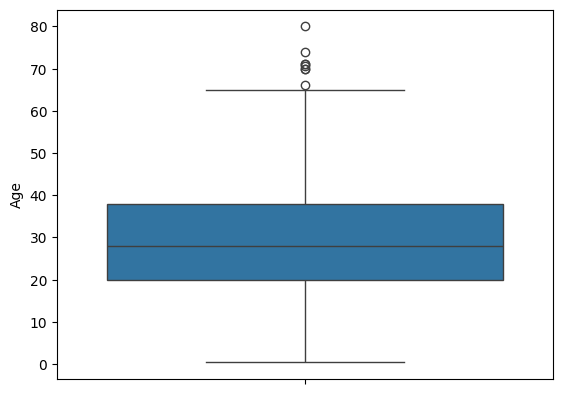

In [17]:
sns.boxplot(data['Age'])

In [18]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

<Axes: ylabel='Age'>

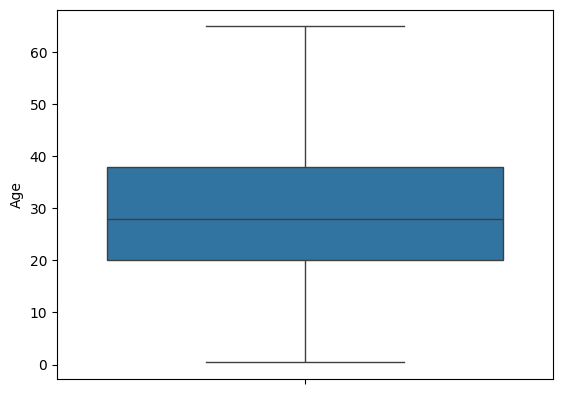

In [19]:
sns.boxplot(data['Age'])

In [20]:
dup = data.duplicated()
num_duplicates = dup.sum()
print(f'number of duplicate rows: {num_duplicates}')
data = data.drop_duplicates()

number of duplicate rows: 0


In [21]:
dup_passengerid = data['PassengerId'].duplicated()
num_dup_passengerid = dup_passengerid.sum()
print(f'number of duplicate passengr ids are {num_dup_passengerid}')

number of duplicate passengr ids are 0


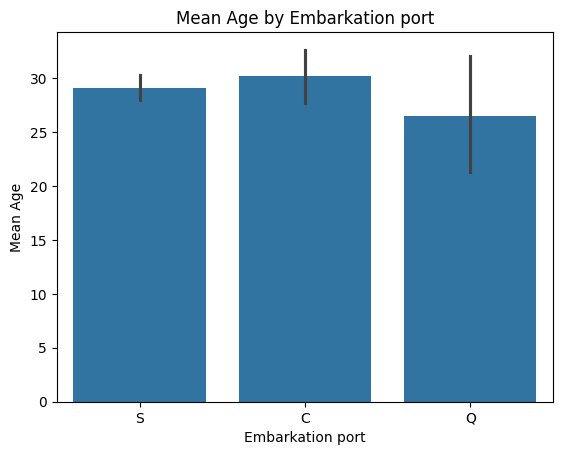

In [23]:
data['Age'] = data['Age'].astype(float)
sns.barplot(x='Embarked', y='Age', data=data, estimator=np.mean)
plt.title('Mean Age by Embarkation port')
plt.xlabel('Embarkation port')
plt.ylabel('Mean Age')
plt.show()

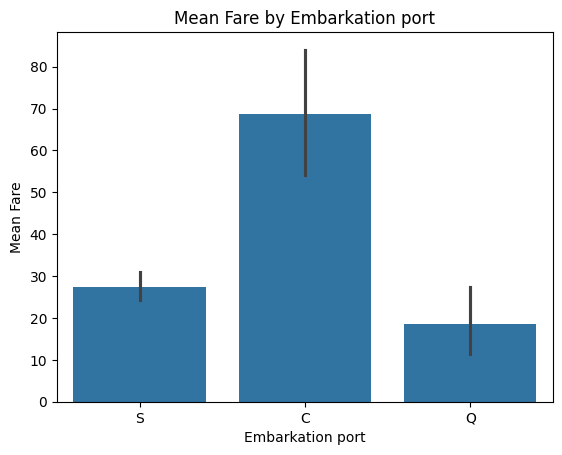

In [25]:
sns.barplot(x='Embarked', y='Fare', data=data, estimator=np.mean)
plt.title('Mean Fare by Embarkation port')
plt.xlabel('Embarkation port')
plt.ylabel('Mean Fare')
plt.show()

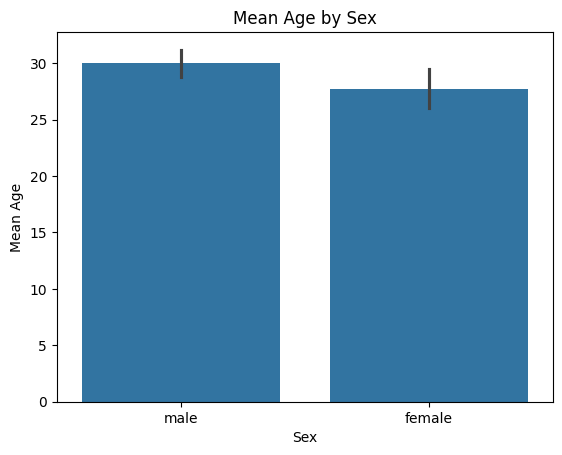

In [24]:
data['Age'] = data['Age'].astype(float)
sns.barplot(x='Sex', y='Age', data=data, estimator=np.mean)
plt.title('Mean Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Age')
plt.show()

In [26]:
corr_by_sex = data.groupby('Sex')[['Age', 'Fare']].corr().unstack()['Age']['Fare']
print(f'THESE VALES ARE CORRELATION BY SEX{corr_by_sex}')

THESE VALES ARE CORRELATION BY SEXSex
female    0.167302
male      0.082954
Name: Fare, dtype: float64


In [27]:
df = pd.DataFrame(data)
pearson_corr = df[['Age', 'Survived']].corr()
print(f'Thi values show the survival correlation with age {pearson_corr}')

Thi values show the survival correlation with age                Age  Survived
Age       1.000000 -0.069069
Survived -0.069069  1.000000


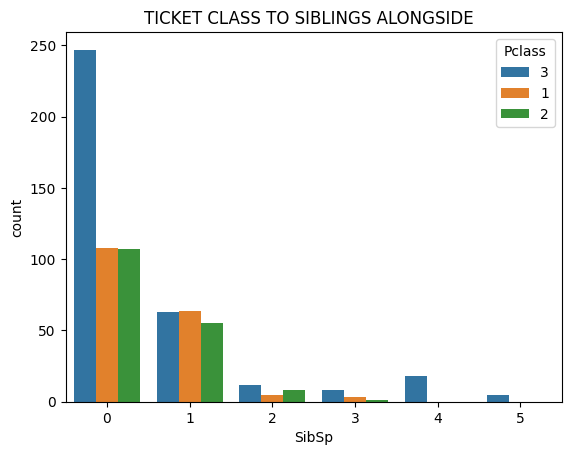

In [28]:
data['Pclass'] = data['Pclass'].astype(str)
sns.countplot(x='SibSp',hue='Pclass', data=data)
plt.title('TICKET CLASS TO SIBLINGS ALONGSIDE  ')
plt.show()

Text(0.5, 1.0, 'MALE AND FEMALE AT EMBARKTION POINTS')

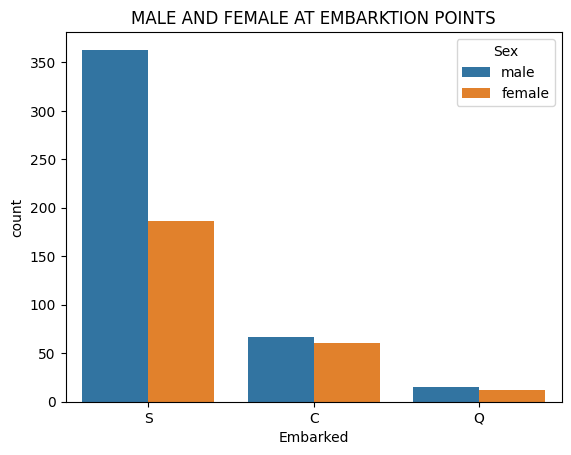

In [29]:
sns.countplot(x='Embarked',hue='Sex', data=data)
plt.title('MALE AND FEMALE AT EMBARKTION POINTS')

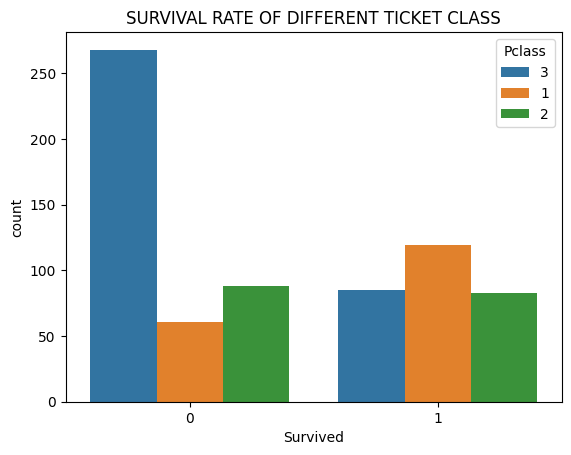

In [30]:
data['Pclass'] = data['Pclass'].astype(str)
sns.countplot(x='Survived',hue='Pclass', data=data)
plt.title('SURVIVAL RATE OF DIFFERENT TICKET CLASS')
plt.show()

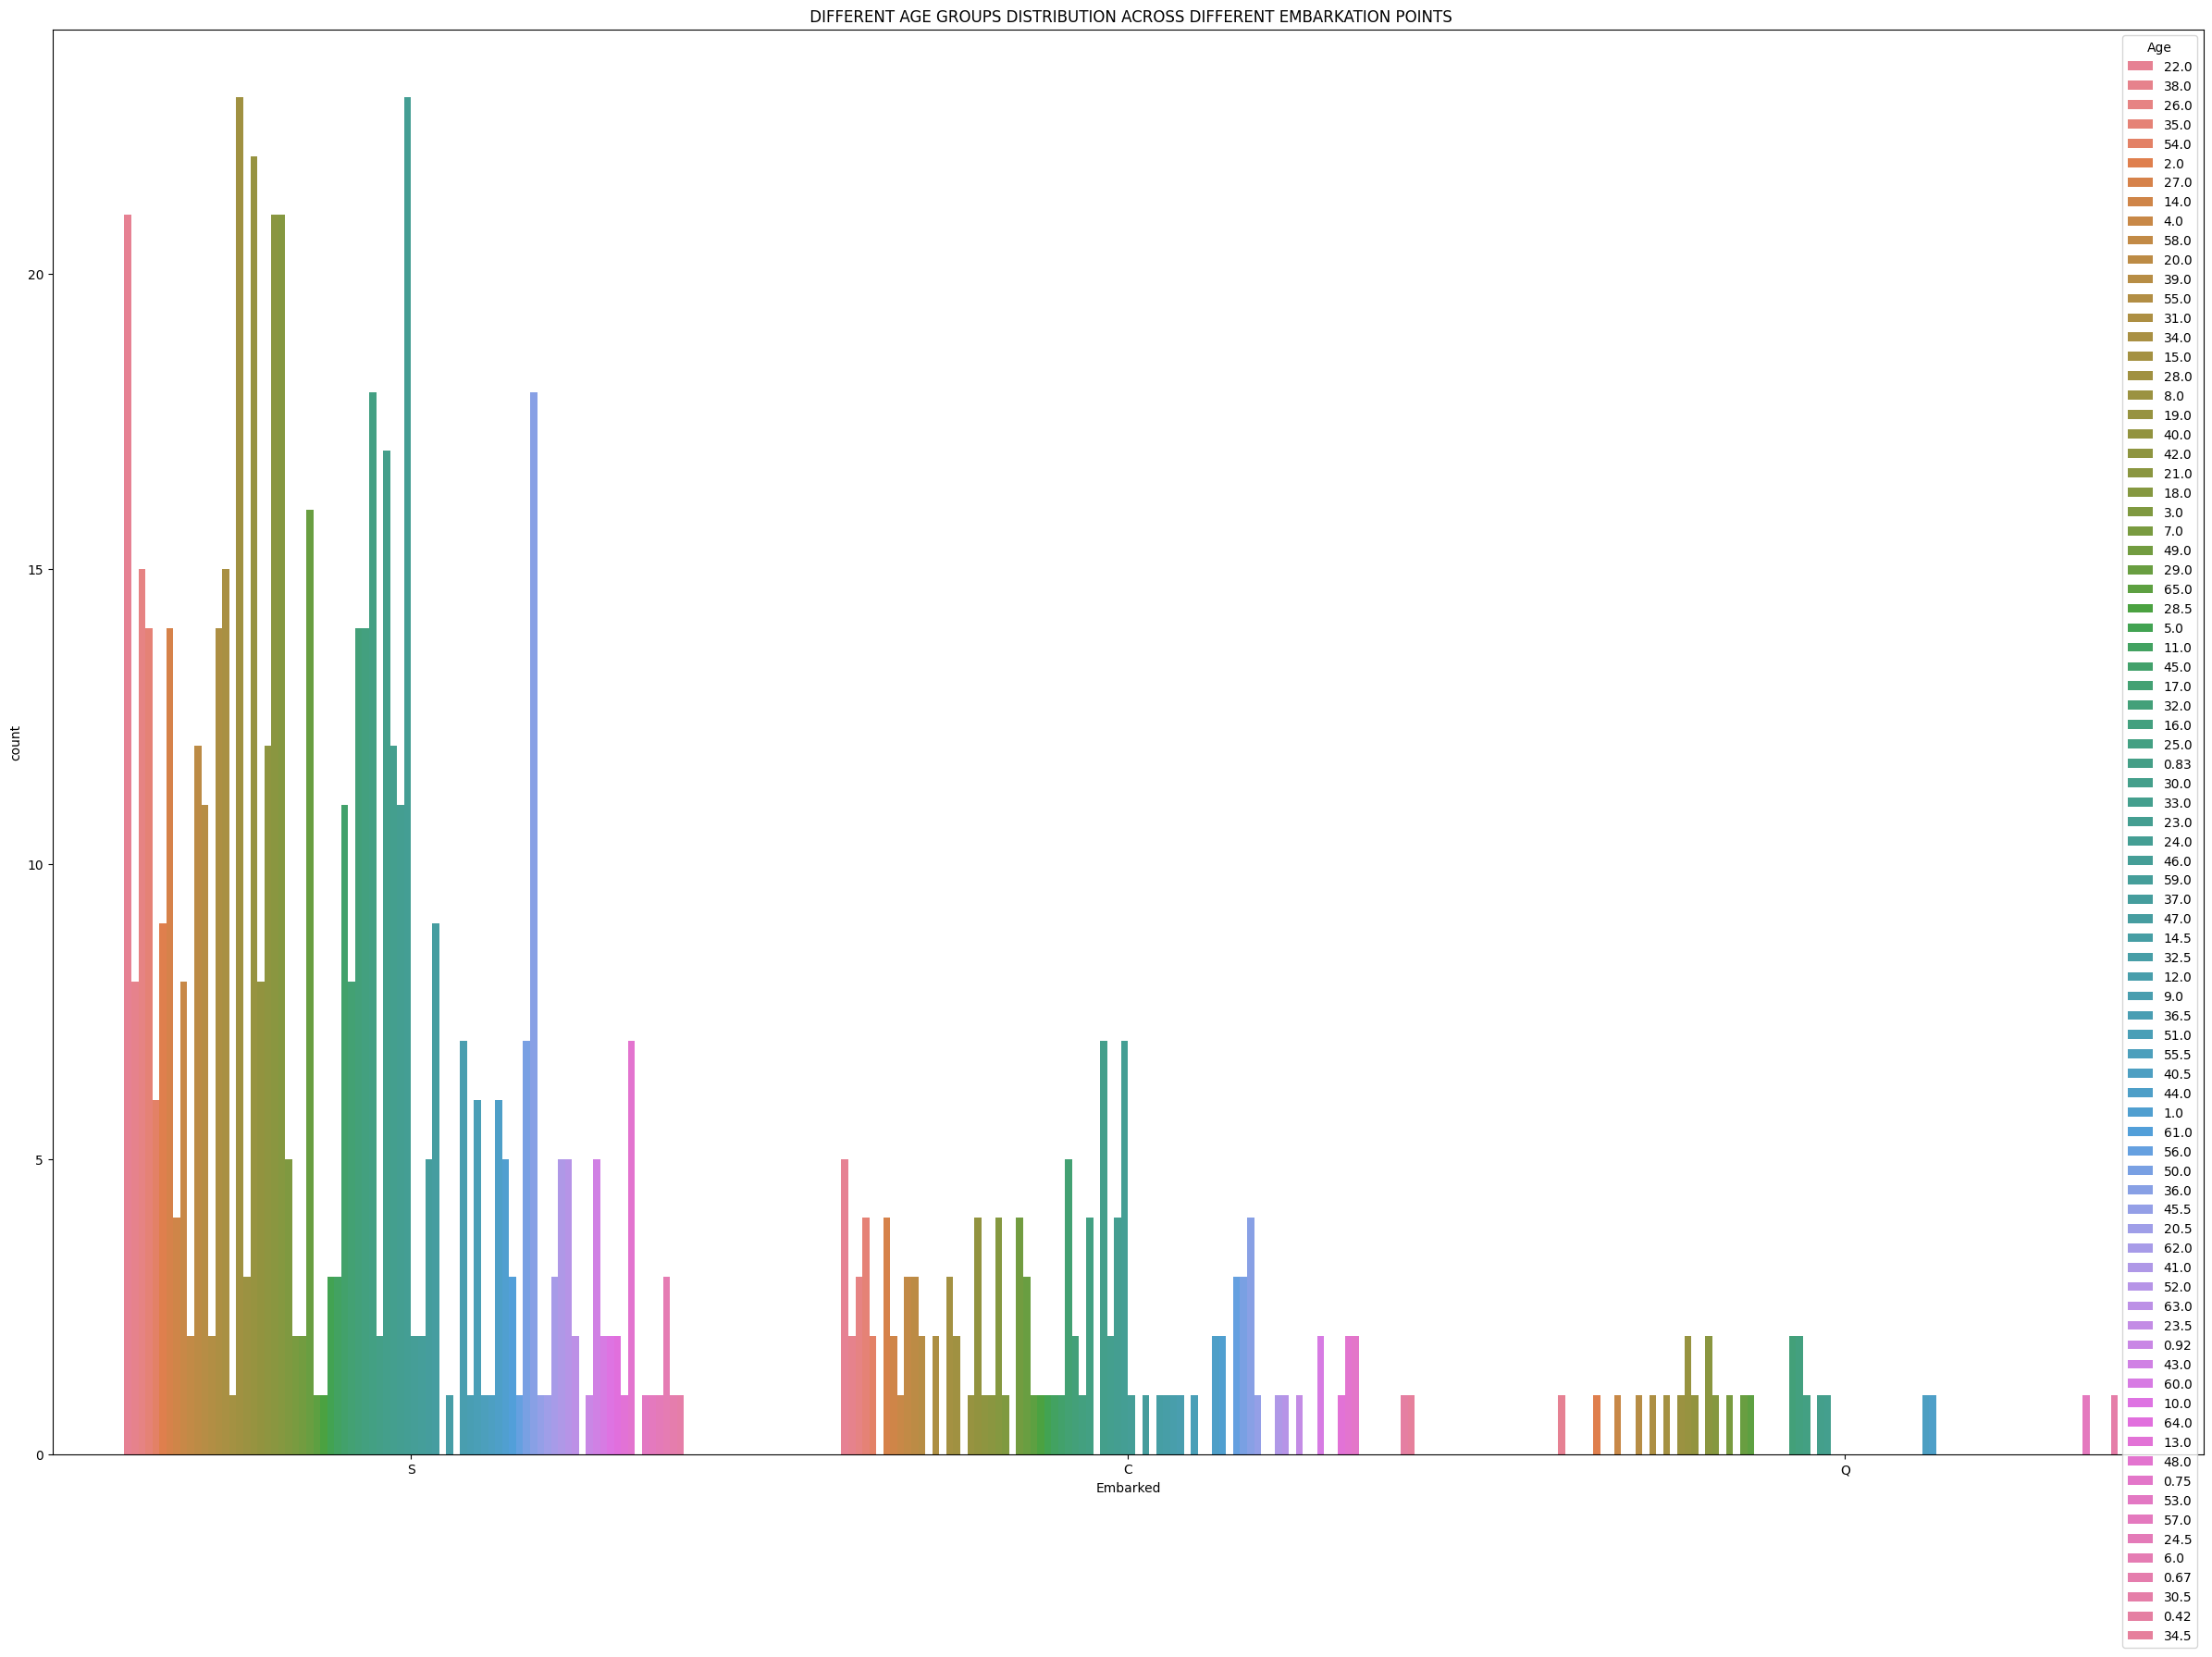

In [31]:
data['Age'] = data['Age'].astype(str)
plt.figure(figsize=(30,20))
sns.countplot(x='Embarked',hue='Age', data=data)
plt.title(' DIFFERENT AGE GROUPS DISTRIBUTION ACROSS DIFFERENT EMBARKATION POINTS')
plt.show()